<a href="https://colab.research.google.com/github/mflavioep/UnivespPJI410/blob/main/PJI410_Notebook_03_Implementa%C3%A7%C3%A3o_da_Rede_Neural_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***NOTEBOOK 03 - Implementação da Rede Neural do tipo MLP***

*   DATA: 28/05/2023
*   Arquivo: PJI410 Notebook 03 - Implementação da  Rede Neural MLP.ipynb
*   Disponível em: https://github.com/mflavioep/UnivespPJI410



**UNIVERSIDADE VIRTUAL DO ESTADO DE SÃO PAULO**

**Disciplina:** Projeto Integrador em Computação IV 

**Tema:** Controle de rotatividade de estacionamento de estabelecimento comercial com promoções integradas com Inteligência Artificial agregada. 

**Integrantes:**
*   Goldenberg Ferreira Vieira, RA: 2006475
*   Marcos Chiorato, RA: 2001027
*   Marcos Flávio Eli Pereira, RA: 2012284 
*   William Domingos da Silva, RA: 2009717

**Polos:** Americana, Jaguariúna, Várzea Paulista, Sumaré

**Orientador do PI:** Lucas Campos Ferreira 




**BIBLIOTECAS UTILIZADAS**

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import sklearn.datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

**IMPORTAÇÃO DOS DADOS**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
url = '/content/drive/MyDrive/Colab Notebooks/Univesp/PJI410_FluxoTratado.csv'

In [4]:
# Faz o leitura do arquivo de dados no formato CSV e converte em uma DataFrame Pandas
df = pd.read_csv(url)

In [5]:
df.isnull().any() 

datahora          False
fluxo             False
es                False
vagas_ocupadas    False
dtype: bool

In [6]:
df.dtypes

datahora          object
fluxo              int64
es                 int64
vagas_ocupadas     int64
dtype: object

Gráfico para observar a distribuição das vagas ocupadas durante a semana, o auxílio visual é extremamente importante para que haja a compreensão do problema a ser tratado.

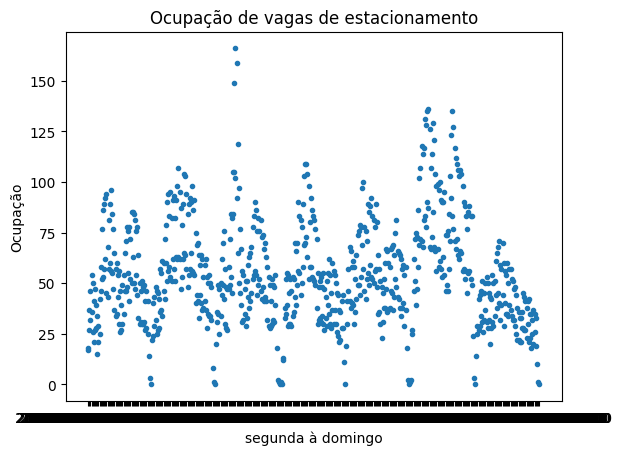

In [7]:
# Plotar um histograma da amostra de dados
plt.plot(df['datahora'], df['vagas_ocupadas'],'.')

# Personalizar o gráfico
plt.title('Ocupação de vagas de estacionamento')
plt.xlabel('segunda à domingo')
plt.ylabel('Ocupação')
plt.show()

Separação dos conjuntos para treino, validação e testes da rede MLP

In [8]:
np.sin(pd.to_datetime(df['datahora']).astype(int) / 10**9) + 1

0      0.632648
1      0.632648
2      1.903703
3      1.903703
4      1.487087
         ...   
758    1.920311
759    1.920311
760    0.670640
761    0.036051
762    1.201643
Name: datahora, Length: 763, dtype: float64

In [9]:
pd.to_datetime(df['datahora']).dt.strftime('%d%H%M').astype(int)

0      130815
1      130815
2      130830
3      130830
4      130845
        ...  
758    192115
759    192115
760    192130
761    192145
762    192200
Name: datahora, Length: 763, dtype: int64

(121, 1)
(31, 1)
(611, 1)


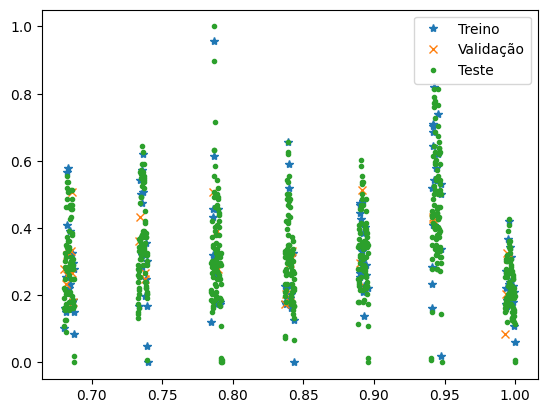

In [10]:
#X = pd.to_datetime(df['datahora']).astype(int) / 10**17
X = pd.to_datetime(df['datahora']).dt.strftime('%d%H%M').astype(float)
Y = df['vagas_ocupadas'].astype(int)

X = X/X.max()
Y = Y/Y.max()

#X = np.arange(0,7,0.05)
#Y = np.sin(X) + 0.3*np.random.randn(X.shape[0]) + 0.5*X

X = X.values
Y = Y.values
X = X.reshape((-1, 1))
Y = Y.reshape((-1, 1))


# Separação desenvolvimento (60) e teste (40)
X_dev, X_test, Y_dev, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Separação treino (80) e validação (20)
X_train, X_val, Y_train, Y_val = train_test_split(X_dev, Y_dev, test_size=0.2, random_state=42)


print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

plt.plot(X_train, Y_train, '*', label='Treino')
plt.plot(X_val, Y_val, 'x', label='Validação')
plt.plot(X_test, Y_test, '.', label='Teste')
plt.legend()
plt.show()

In [11]:
print(X.max(),X.min())


1.0 0.6806191467221644


Uso do Pytorch. Transformação dos dados em tensores

In [12]:
# verificando disponibilidade da gpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

***MODELO MLP DE VÁRIAS CAMANDAS (MULTILAYER)***

In [13]:
class MLP(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(MLP,self).__init__()
        self.rede = nn.Sequential(
            nn.Linear(input_dim,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,output_dim),
        )
    def forward(self,x):
        out =  self.rede(x)
        return out

In [14]:
input_dim  = 1 # número de atributos
output_dim = 1 # número de classes

modelo = MLP(input_dim,output_dim)

In [15]:
from torchsummary import summary

print(modelo)
summary(modelo, (100,1))

MLP(
  (rede): Sequential(
    (0): Linear(in_features=1, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=1, bias=True)
  )
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1             [-1, 100, 256]             512
              ReLU-2             [-1, 100, 256]               0
            Linear-3             [-1, 100, 128]          32,896
              ReLU-4             [-1, 100, 128]               0
            Linear-5              [-1, 100, 64]           8,256
              ReLU-6              [-1, 100, 64]               0
            Linear-7              [-1, 100, 32]           2,080
              ReLU-8    

Otimizador da função de custo

In [16]:
eta = 0.02
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(modelo.parameters(),lr=eta)

**TREINAMENTO DA REDE NEURAL** ☕

In [17]:
x_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(Y_train)

x_val = torch.FloatTensor(X_val)
y_val = torch.FloatTensor(Y_val)

x_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(Y_test)

In [18]:
def train_network(model,optimizer,loss_function,x_train,y_train,x_val,y_val,num_epochs,train_losses,val_losses):
    for epoch in range(num_epochs):
        # zerando os gradientes da época anterior
        optimizer.zero_grad()
        
        # fase de propagação
        output_train = model(x_train)

        # cálculo do erro (função de custo - loss function)
        loss_train = loss_function(output_train, y_train)

        # fase de retroprogação
        loss_train.backward()

        # atualização dos pesos da rede
        optimizer.step()

        # avaliando o modelo com o conjunto de validação
        output_val = model(x_val)
        loss_val = loss_function(output_val,y_val)

        train_losses[epoch] = loss_train.item()
        val_losses[epoch] = loss_val.item()

        if (epoch + 1) % 1000 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Erro Treino: {loss_train.item():.4f},  Erro Validação: {loss_val.item():.3f}")

In [19]:
num_epochs = 20000
train_losses = np.zeros(num_epochs)
val_losses  = np.zeros(num_epochs)

train_network(modelo,optimizer,loss_function,x_train,y_train,x_val,y_val,num_epochs,train_losses,val_losses)

Epoch 1000/20000, Erro Treino: 0.0331,  Erro Validação: 0.011
Epoch 2000/20000, Erro Treino: 0.0330,  Erro Validação: 0.011
Epoch 3000/20000, Erro Treino: 0.0330,  Erro Validação: 0.011
Epoch 4000/20000, Erro Treino: 0.0329,  Erro Validação: 0.011
Epoch 5000/20000, Erro Treino: 0.0329,  Erro Validação: 0.011
Epoch 6000/20000, Erro Treino: 0.0328,  Erro Validação: 0.011
Epoch 7000/20000, Erro Treino: 0.0328,  Erro Validação: 0.011
Epoch 8000/20000, Erro Treino: 0.0327,  Erro Validação: 0.011
Epoch 9000/20000, Erro Treino: 0.0327,  Erro Validação: 0.011
Epoch 10000/20000, Erro Treino: 0.0326,  Erro Validação: 0.011
Epoch 11000/20000, Erro Treino: 0.0326,  Erro Validação: 0.011
Epoch 12000/20000, Erro Treino: 0.0326,  Erro Validação: 0.011
Epoch 13000/20000, Erro Treino: 0.0326,  Erro Validação: 0.011
Epoch 14000/20000, Erro Treino: 0.0325,  Erro Validação: 0.011
Epoch 15000/20000, Erro Treino: 0.0325,  Erro Validação: 0.011
Epoch 16000/20000, Erro Treino: 0.0325,  Erro Validação: 0.011
E

Resultados

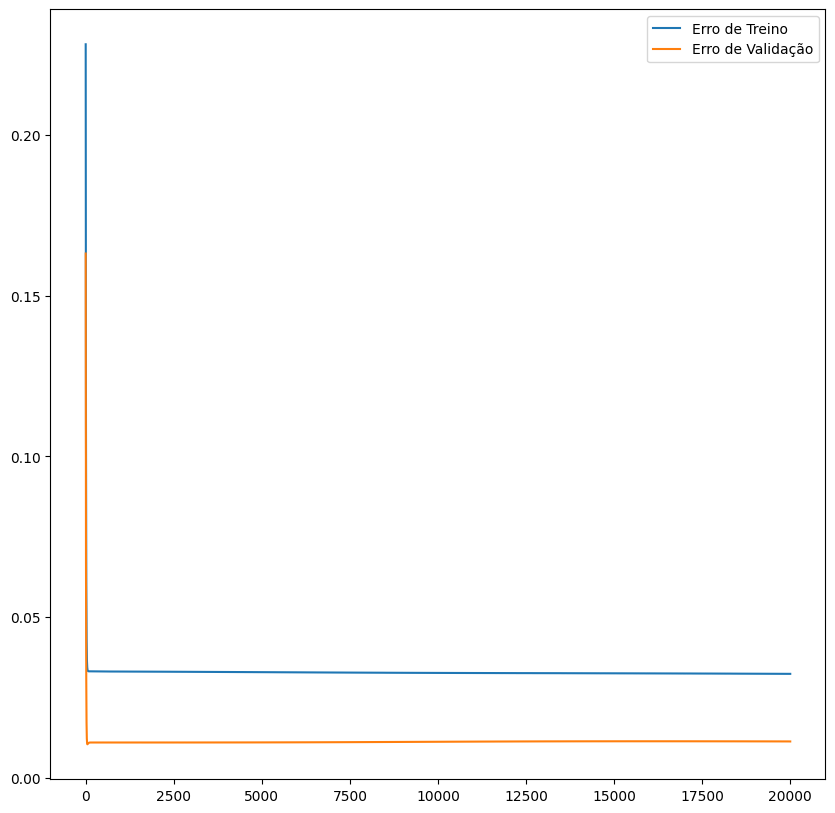

In [20]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='Erro de Treino')
plt.plot(val_losses, label='Erro de Validação')
plt.legend()
plt.show()

In [21]:
predictions_train = []
predictions_val = []
predictions_test =  []
with torch.no_grad():
    predictions_train = modelo(x_train)
    predictions_val = modelo(x_val)
    predictions_test = modelo(x_test)

erro_train = loss_function(predictions_train,y_train)
erro_val = loss_function(predictions_val,y_val)
erro_test = loss_function(predictions_test,y_test)

# from sklearn.metrics import accuracy_score
# acc_train = accuracy_score(x_train, predictions_train)

print(f"Erro de Treino: {erro_train}")
print(f"Erro de Validação: {erro_val}")
print(f"Erro de Teste: {erro_test}")

Erro de Treino: 0.03232668340206146
Erro de Validação: 0.01129679661244154
Erro de Teste: 0.022550413385033607


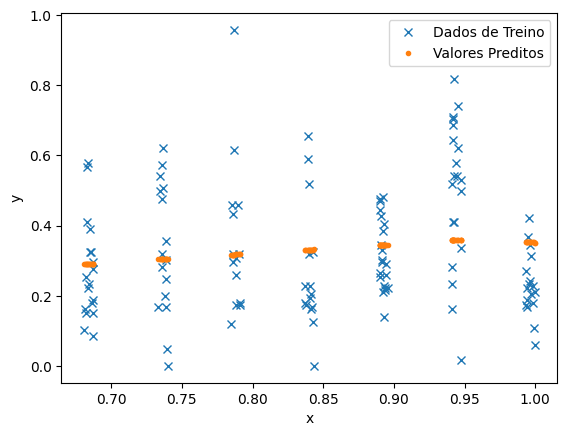

In [22]:
plt.plot(x_train, y_train, 'x', label='Dados de Treino')
plt.plot(x_train, predictions_train, '.', label='Valores Preditos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

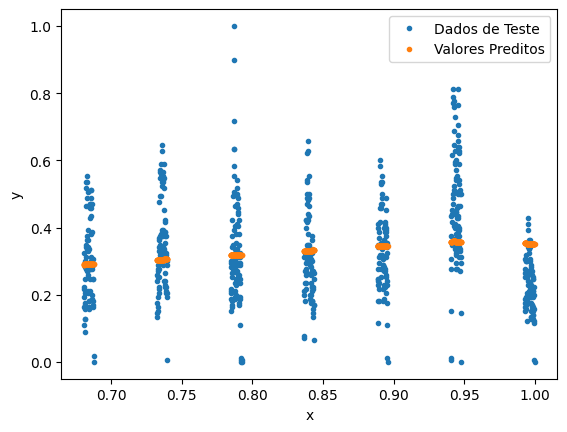

In [23]:
plt.plot(x_test, y_test, '.', label='Dados de Teste')
plt.plot(x_test, predictions_test, '.', label='Valores Preditos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

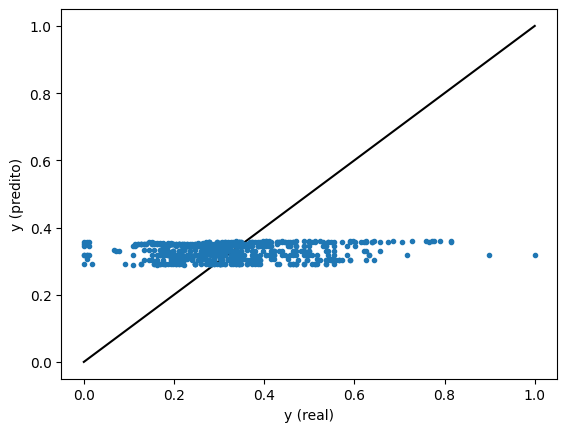

In [24]:
plt.plot([0,torch.max(y_test)],[0,torch.max(y_test)], 'black')
plt.plot(y_test, predictions_test, '.')
plt.xlabel('y (real)')
plt.ylabel('y (predito)')
#plt.legend()
plt.show()